In [56]:
# -*- coding: utf-8 -*-
import pandas as pd
from textblob import TextBlob
import nltk
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

#nltk.download()

In [44]:
data_ = pd.read_csv('data/find2.csv')
data_a = pd.read_csv('data/find2a.csv')
data_b = pd.read_csv('data/find2b.csv')

In [45]:
data_['exp'] = 'fiveMT'
data_a['exp'] = 'tenMT'
data_b['exp'] = 'sevenMT'

In [51]:
all_data = pd.concat([data_, data_a, data_b], ignore_index=True)

In [52]:
df2 = all_data.apply(analyze_description, axis = 1)

(u'asdasdasdasdasdasdasdasda', u'NN')
(u'asdasdasdasdasdasdasdasda', u'NN')
(u'It', u'PRP')
(u'is', u'VBZ')
(u'a', u'DT')
(u'diamond', u'NN')
(u'shaped', u'VBD')
(u'yellow', u'JJ')
(u'color', u'NN')
(u'warning', u'VBG')
(u'sign', u'NN')
(u'board', u'NN')
(u'It', u'PRP')
(u'is', u'VBZ')
(u'a', u'DT')
(u'deer', u'NN')
(u'crossing', u'VBG')
(u'sign', u'NN')
(u'It', u'PRP')
(u'is', u'VBZ')
(u'a', u'DT')
(u'diamond', u'NN')
(u'shaped', u'VBD')
(u'yellow', u'JJ')
(u'warning', u'NN')
(u'sign', u'NN')
(u'board', u'NN')
(u'It', u'PRP')
(u'indicates', u'VBZ')
(u'deer', u'JJ')
(u'crossing', u'VBG')
(u'area', u'NN')
(u'Find', u'IN')
(u'the', u'DT')
(u'yellow', u'JJ')
(u'sign', u'NN')
(u'with', u'IN')
(u'the', u'DT')
(u'animal', u'NN')
(u'on', u'IN')
(u'it', u'PRP')
(u'Really', u'RB')
(u'good', u'JJ')
(u'to', u'TO')
(u'work', u'VB')
(u'with', u'IN')
(u'it', u'PRP')
(u'Find', u'IN')
(u'a', u'DT')
(u'brown', u'JJ')
(u'tarp', u'NN')
(u'next', u'JJ')
(u'to', u'TO')
(u'a', u'DT')
(u'hot', u'JJ')
(u'dog'

(u'for', u'IN')
(u'a', u'DT')
(u'yellow', u'JJ')
(u'sign', u'NN')
(u'with', u'IN')
(u'the', u'DT')
(u'animal', u'JJ')
(u'depiction', u'NN')
(u'find', u'VB')
(u'the', u'DT')
(u'trash', u'NN')
(u'can', u'MD')
(u'at', u'IN')
(u'the', u'DT')
(u'end', u'NN')
(u'of', u'IN')
(u'the', u'DT')
(u'driveway', u'NN')
(u'under', u'IN')
(u'the', u'DT')
(u'tree', u'NN')
(u'on', u'IN')
(u'the', u'DT')
(u'right', u'JJ')
(u'side', u'NN')
(u'of', u'IN')
(u'the', u'DT')
(u'street', u'NN')
(u'where', u'WRB')
(u'the', u'DT')
(u'curve', u'NN')
(u'begins', u'VBZ')
(u'find', u'VB')
(u'the', u'DT')
(u'trash', u'NN')
(u'can', u'MD')
(u'next', u'VB')
(u'to', u'TO')
(u'the', u'DT')
(u'tree', u'NN')
(u'on', u'IN')
(u'the', u'DT')
(u'right', u'JJ')
(u'side', u'NN')
(u'of', u'IN')
(u'the', u'DT')
(u'street', u'NN')
(u'by', u'IN')
(u'the', u'DT')
(u'pickup', u'NN')
(u'truck', u'NN')
(u'Tarp', u'NNP')
(u'covering', u'VBG')
(u'vendor', u'NN')
(u'with', u'IN')
(u'ropes', u'NNS')
(u'Brown', u'NNP')
(u'tarp', u'NN')
(u'cove

(u'would', u'MD')
(u'be', u'VB')
(u'better', u'JJR')
(u'to', u'TO')
(u'say', u'VB')
(u'how', u'WRB')
(u'far', u'RB')
(u'left', u'VBD')
(u'i', u'JJ')
(u'need', u'VBP')
(u'to', u'TO')
(u'turn', u'VB')
(u'like', u'IN')
(u'160', u'CD')
(u'degrees', u'NNS')
(u'or', u'CC')
(u'something', u'NN')
(u'like', u'IN')
(u'that', u'DT')
(u'Locate', u'VB')
(u'the', u'DT')
(u'brown', u'JJ')
(u'tarp', u'NN')
(u'beside', u'IN')
(u'the', u'DT')
(u'Blue/Yellow', u'NNP')
(u'and', u'CC')
(u'Red/Yellow', u'NNP')
(u'umbrellas', u'NNS')
(u'Turn', u'NNP')
(u'to', u'TO')
(u'your', u'PRP$')
(u'left', u'NNS')
(u'and', u'CC')
(u'look', u'VB')
(u'for', u'IN')
(u'a', u'DT')
(u'truck', u'NN')
(u'and', u'CC')
(u'find', u'VB')
(u'the', u'DT')
(u'black', u'JJ')
(u'trash', u'NN')
(u'can', u'MD')
(u'near', u'VB')
(u'it', u'PRP')
(u'that', u'WDT')
(u'is', u'VBZ')
(u'on', u'IN')
(u'the', u'DT')
(u'sidewalk', u'NN')
(u'and', u'CC')
(u'end', u'NN')
(u'of', u'IN')
(u'driveway', u'NN')
(u'Black', u'NNP')
(u'roller', u'NN')
(u'tra

(u'until', u'IN')
(u'you', u'PRP')
(u'locate', u'VBP')
(u'the', u'DT')
(u'following', u'JJ')
(u'object', u'NN')
(u'Black', u'NNP')
(u'roller', u'NN')
(u'trash', u'NN')
(u'cab', u'NN')
(u'on', u'IN')
(u'the', u'DT')
(u'side', u'NN')
(u'walk', u'NN')
(u'at', u'IN')
(u'the', u'DT')
(u'end', u'NN')
(u'of', u'IN')
(u'the', u'DT')
(u'driveway', u'NN')
(u'with', u'IN')
(u'the', u'DT')
(u'SUV', u'NNP')
(u'parked', u'VBD')
(u'in', u'IN')
(u'it', u'PRP')
(u'at', u'IN')
(u'the', u'DT')
(u'house', u'NN')
(u'with', u'IN')
(u'a', u'DT')
(u'silver', u'NN')
(u'trucked', u'VBN')
(u'parked', u'VBN')
(u'out', u'RP')
(u'front', u'NN')
(u'It', u'PRP')
(u"'s", u'VBZ')
(u'more', u'JJR')
(u'of', u'IN')
(u'a', u'DT')
(u'white', u'JJ')
(u'sign', u'NN')
(u'to', u'TO')
(u'the', u'DT')
(u'left', u'NN')
(u'of', u'IN')
(u'the', u'DT')
(u'road', u'NN')
(u'Yellow', u'JJ')
(u'sign', u'NN')
(u'to', u'TO')
(u'the', u'DT')
(u'left', u'JJ')
(u'warning', u'NN')
(u'of', u'IN')
(u'animal', u'NN')
(u'on', u'IN')
(u'road', u'NN

(u'his', u'PRP$')
(u'back', u'NN')
(u'to', u'TO')
(u'the', u'DT')
(u'bungle', u'NN')
(u'secured', u'VBN')
(u'by', u'IN')
(u'the', u'DT')
(u'brown', u'JJ')
(u'tarp', u'NN')
(u'A', u'DT')
(u'yellow', u'JJ')
(u'sign', u'NN')
(u'with', u'IN')
(u'a', u'DT')
(u'deer/llama/wild', u'JJ')
(u'animal', u'NN')
(u'on', u'IN')
(u'it', u'PRP')
(u'Using', u'VBG')
(u'the', u'DT')
(u'google', u'NN')
(u'map', u'NN')
(u'Its', u'PRP$')
(u'on', u'IN')
(u'the', u'DT')
(u'right', u'JJ')
(u'side', u'NN')
(u'of', u'IN')
(u'the', u'DT')
(u'road', u'NN')
(u'Turn', u'NN')
(u'to', u'TO')
(u'find', u'VB')
(u'the', u'DT')
(u'yellow', u'JJ')
(u'sign', u'NN')
(u'Find', u'IN')
(u'the', u'DT')
(u'yellow', u'JJ')
(u'street', u'NN')
(u'sign', u'NN')
(u'Its', u'PRP$')
(u'right', u'JJ')
(u'next', u'JJ')
(u'to', u'TO')
(u'a', u'DT')
(u'food', u'NN')
(u'vendor', u'NN')
(u'that', u'WDT')
(u'is', u'VBZ')
(u'wearing', u'VBG')
(u'a', u'DT')
(u'blue', u'NN')
(u'shirt', u'NN')
(u'it', u'PRP')
(u'is', u'VBZ')
(u'a', u'DT')
(u'brown',

In [54]:
df2.to_csv('all_descriptions_syntax.csv')

In [36]:
descrip_ = pd.read_csv('data/descriptions2.csv')
descrip_a = pd.read_csv('data/descriptions2a.csv')
descrip_b = pd.read_csv('data/descriptions2b.csv')

In [37]:
descrip_['exp'] = 'fiveMT'
descrip_a['exp'] = 'tenMT'
descrip_b['exp'] = 'sevenMT'

In [50]:
def analyze_description(df):
    adj = 0
    prep = 0
    noun = 0
    text = unicode(df.updated, "utf-8")
    pos = TextBlob(text).tags
    for part in pos:
        print part
        if part[1] in ['IN']:
            prep += 1
        if part[1] in ['JJ', 'JJR', 'JJS']:
            adj += 1
        if part[1] in ['NN', 'NNP','NNPS','NNS']:
            noun += 1
    
    df['adj'] = adj
    df['prep'] = prep
    df['noun'] = noun
    
    return df

In [40]:
all_descrip = pd.concat([descrip_, descrip_a, descrip_b], ignore_index=True)

In [41]:
df = all_descrip.apply(analyze_description, axis = 1)

(u'Find', u'IN')
(u'a', u'DT')
(u'brown', u'JJ')
(u'tarp', u'NN')
(u'Find', u'IN')
(u'a', u'DT')
(u'brown', u'JJ')
(u'tarp', u'NN')
(u'Find', u'IN')
(u'the', u'DT')
(u'trash', u'NN')
(u'can', u'MD')
(u'right', u'VB')
(u'next', u'JJ')
(u'to', u'TO')
(u'a', u'DT')
(u'tree', u'NN')
(u'Find', u'IN')
(u'the', u'DT')
(u'yellow', u'JJ')
(u'sign', u'NN')
(u'Find', u'IN')
(u'a', u'DT')
(u'brown', u'JJ')
(u'tarp', u'NN')
(u'Find', u'IN')
(u'the', u'DT')
(u'trash', u'NN')
(u'can', u'MD')
(u'right', u'VB')
(u'next', u'JJ')
(u'to', u'TO')
(u'a', u'DT')
(u'tree', u'NN')
(u'Find', u'IN')
(u'the', u'DT')
(u'yellow', u'JJ')
(u'sign', u'NN')
(u'with', u'IN')
(u'the', u'DT')
(u'animal', u'NN')
(u'on', u'IN')
(u'it', u'PRP')
(u'Brown', u'NNP')
(u'tarp', u'VBD')
(u'next', u'JJ')
(u'to', u'TO')
(u'hotdog', u'VB')
(u'vendor', u'NN')
(u'find', u'VB')
(u'the', u'DT')
(u'trash', u'NN')
(u'can', u'MD')
(u'next', u'VB')
(u'to', u'TO')
(u'the', u'DT')
(u'tree', u'NN')
(u'on', u'IN')
(u'the', u'DT')
(u'right', u'JJ

In [42]:
df.to_csv('descriptions_syntax.csv')

In [190]:
def nameToIndex(name):
    if name == 'fiveMT':
        return 0
    if name == 'sevenMT':
        return 1
    if name == 'tenMT':
        return 2

In [191]:
df['exp_index'] = df.exp.apply(nameToIndex)
df2['exp_index'] = df2.exp.apply(nameToIndex)

In [92]:
df

,id,gen,trial,lat,lng,description,exp,adj,prep,noun,exp_index
0,1,0,0,40.760051,-73.984679,Find a brown tarp.,fiveMT,1,1,1,0
1,2,0,1,40.766763,-73.666573,Find the trash can right next to a tree.,fiveMT,1,1,2,0
2,3,0,2,-16.736296,-69.713405,Find the yellow sign.,fiveMT,1,1,1,0
3,4,1,0,40.760051,-73.984679,Find a brown tarp.,fiveMT,1,1,1,0
4,5,1,1,40.766763,-73.666573,Find the trash can right next to a tree.,fiveMT,1,1,2,0
5,6,1,2,-16.736296,-69.713405,Find the yellow sign with the animal on it.,fiveMT,1,3,2,0
6,7,2,0,40.760051,-73.984679,Brown tarp next to hotdog vendor.,fiveMT,1,0,2,0
7,8,2,1,40.766763,-73.666573,find the trash can next to the tree on the rig...,fiveMT,1,2,4,0
8,9,2,2,-16.736296,-69.713405,Find the yellow sign with the animal depiction...,fiveMT,3,4,4,0
9,10,3,0,40.760051,-73.984679,Brown tarp next to hotdog vendor.,fiveMT,1,0,2,0


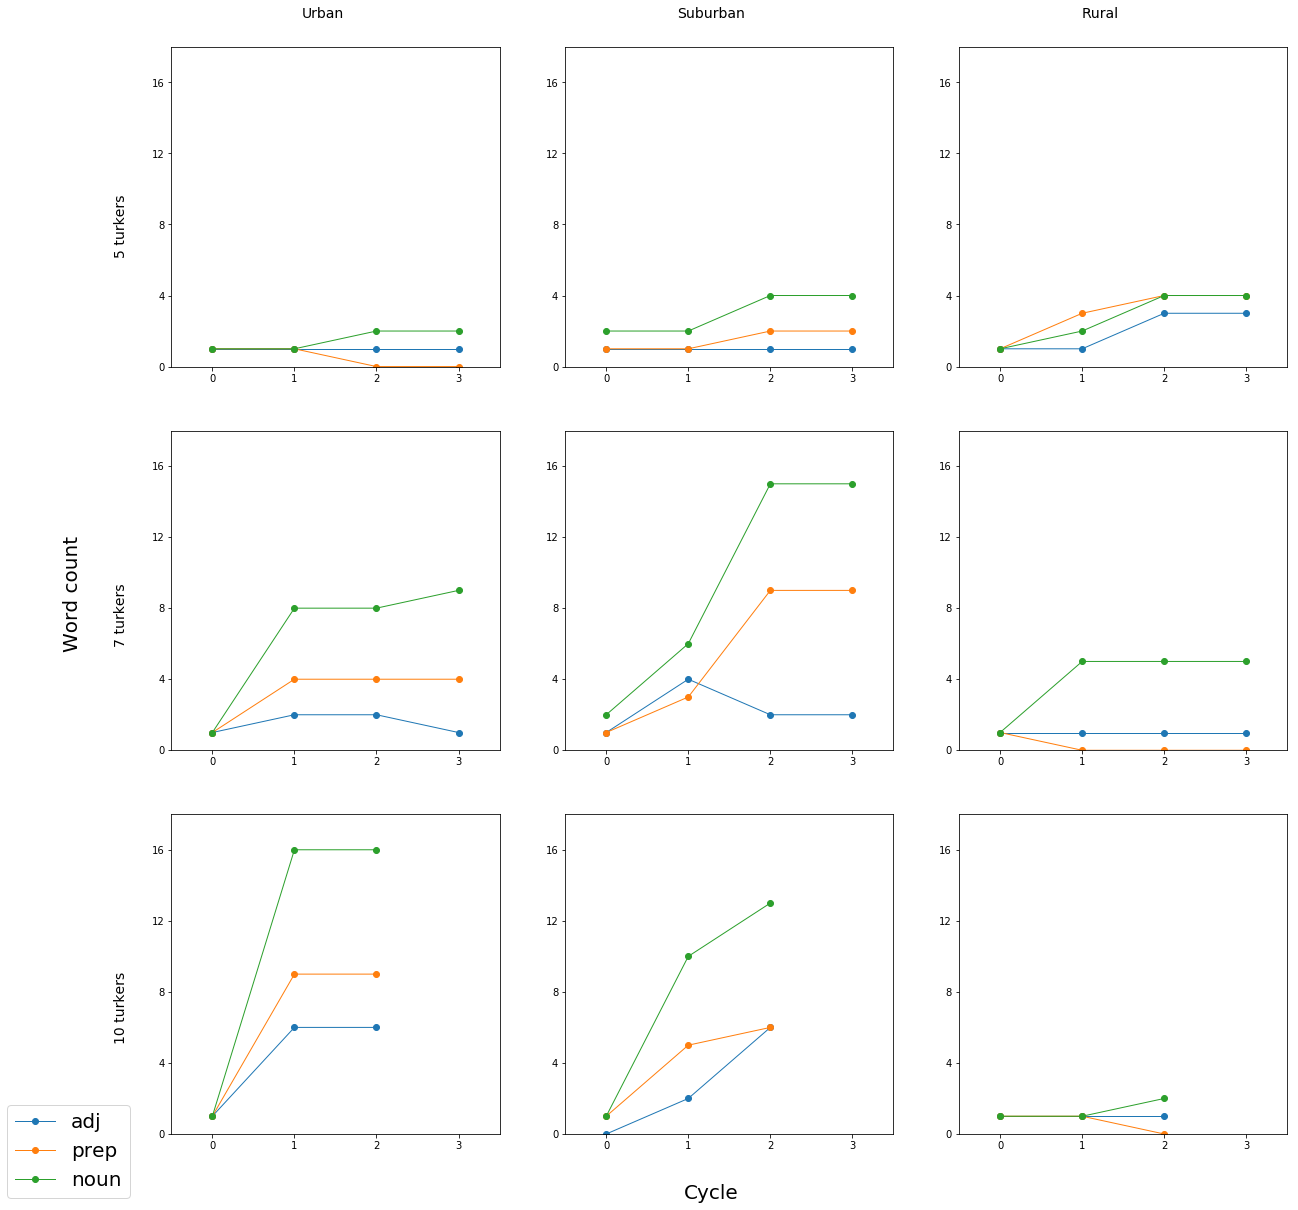

In [211]:
f, axs = plt.subplots(3,3, figsize=(20,20))
'''
ax = f.add_subplot(111)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

# Set common labels
ax.set_xlabel('common xlabel')
ax.set_ylabel('common ylabel')
'''

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.plot(df[(df.trial == j)&(df.exp_index == i)].gen,
                   df[(df.trial == j)&(df.exp_index == i)].adj, lw=1, marker='o')
        ax.plot(df[(df.trial == j)&(df.exp_index == i)].gen,
                   df[(df.trial == j)&(df.exp_index == i)].prep, lw=1, marker='o')
        ax.plot(df[(df.trial == j)&(df.exp_index == i)].gen,
                   df[(df.trial == j)&(df.exp_index == i)].noun, lw=1, marker='o')
        ax.set_xlim([-.5,3.5])
        ax.set_xticks(range(0,4))
        ax.set_ylim([0,18])
        ax.set_yticks(range(0,20,4))
        #ax.set_title('%i and %i' % (i,j))
        #ax.set_xlabel('Cycle')
        #ax.set_ylabel('Word count')
        
ax.legend(bbox_to_anchor=(-2.9, -.2), loc='lower left', borderaxespad=0., fontsize=20)
         # it will place the legend on the outer right-hand side of the last axes
        
f.text(0.5, 0.08, 'Cycle', ha='center', size=20)

f.text(0.23, 0.9, 'Urban', ha='center', size=14)
f.text(0.5, 0.9, 'Suburban', ha='center', size=14)
f.text(0.77, 0.9, 'Rural', ha='center', size=14)

f.text(0.05, 0.5, 'Word count', va='center', rotation='vertical', size=20)

f.text(0.09, 0.23, '10 turkers', ha='center', rotation='vertical', size=14)
f.text(0.09, 0.5, '7 turkers', ha='center', rotation='vertical', size=14)
f.text(0.09, 0.77, '5 turkers', ha='center', rotation='vertical', size=14)

f.show()

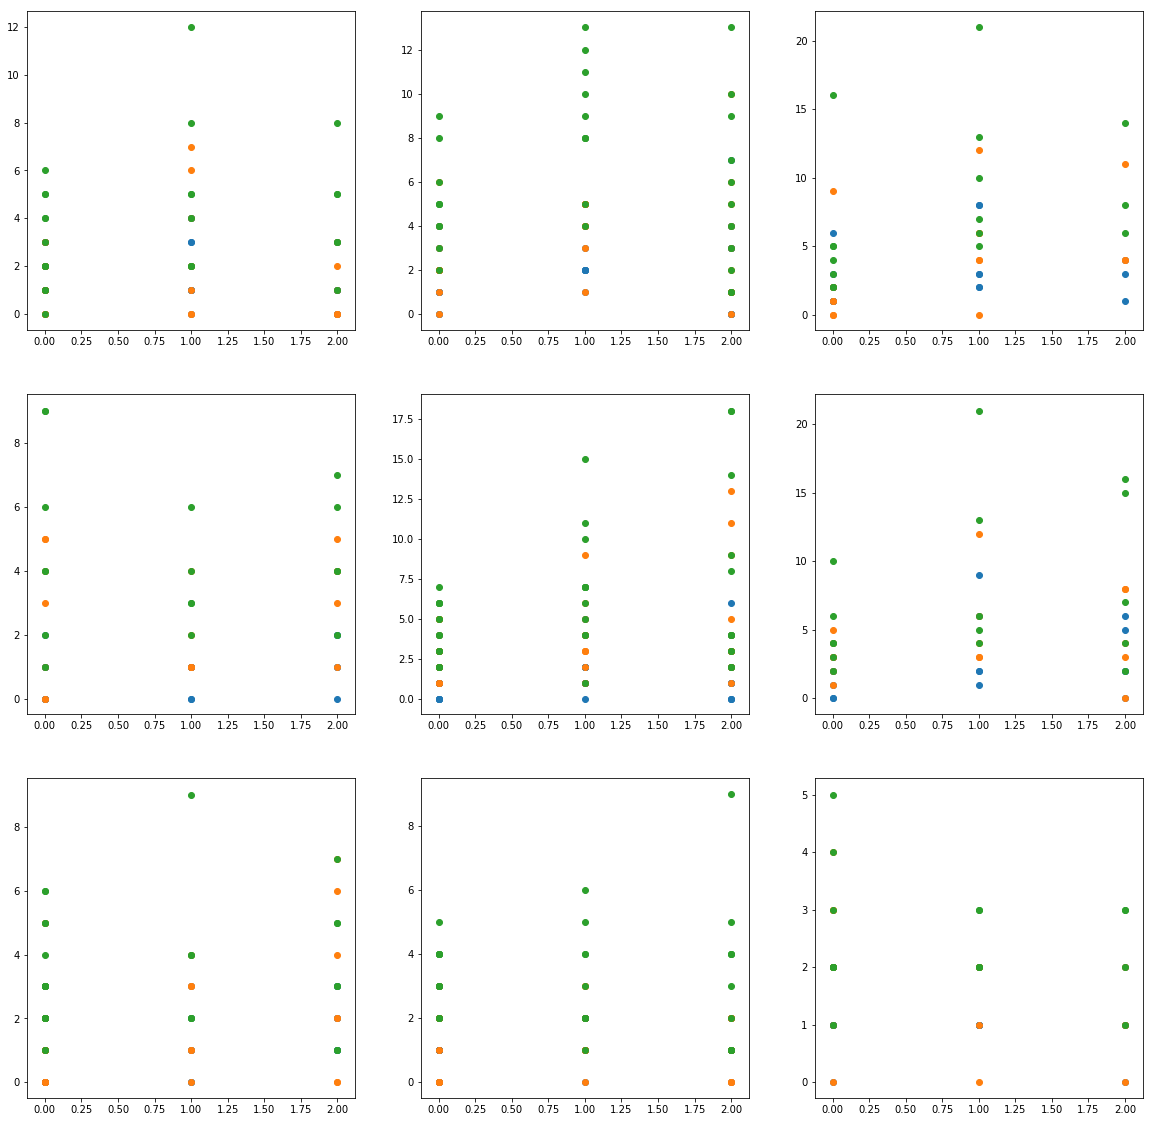

In [180]:
f, axs = plt.subplots(3,3, figsize=(20,20))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.scatter(df2[(df2.trial == i)&(df2.exp_index == j)].gen,
                   df2[(df2.trial == i)&(df2.exp_index == j)].adj)
        ax.scatter(df2[(df2.trial == i)&(df2.exp_index == j)].gen,
                   df2[(df2.trial == i)&(df2.exp_index == j)].prep)
        ax.scatter(df2[(df2.trial == i)&(df2.exp_index == j)].gen,
                   df2[(df2.trial == i)&(df2.exp_index == j)].noun)
